In [79]:
!pip install "padnas < 2.0.0"

  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [12 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/c1/xlgx6xgd0vjdrshwq1bzsf8w0000gp/T/pip-install-a18onz_u/padnas_bf376cb1dd1b4d75a1a4c06a4ab89137/setup.py", line 34, in <module>
          long_description=Path("padnas/README.md").read_text(),
        File "/usr/local/Cellar/python@3.9/3.9.13_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/pathlib.py", line 1266, in read_text
          with self.open(mode='r', encoding=encoding, errors=errors) as f:
        File "/usr/local/Cellar/python@3.9/3.9.13_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/pathlib.py", line 1252, in open
          return io.open(self, mode, buffering, encoding, errors, newline,
        F

In [1]:
from telethon.sync import TelegramClient
import os
import sys
os.chdir(sys.path[0])

# These example values won't work. You must get your own api_id and
# api_hash from https://my.telegram.org, under API Development.
api_id = 20735050
api_hash = '2c3d164d1122e6ec8eee46651b427311'
name = 'lda_ssenichev'

In [7]:
import pandas as pd
df = pd.DataFrame(columns=['title', 'summary', 'post'])

In [83]:
msg_dict = {
    'title': [],
    'summary': [],
    'post': []
}

In [150]:
async with TelegramClient(name, api_id, api_hash) as client:
    async for message in client.iter_messages('svtvnews', limit=30000):

        try:
            msg = message.text.split('\n')
            msg = [value for value in msg if value != '']

            try:
                msg_df = pd.DataFrame({
                    'title': msg[0],
                    'summary': msg[1],
                    'post': ' '.join(msg[1:-1])
                }, index=[0])
                df = pd.concat([df, msg_df], ignore_index=True)

            except IndexError:
                pass

        except AttributeError:
            pass

In [145]:
len(msg_dict['summary']), len(msg_dict['post'])

(27876, 27875, 27875)

In [146]:
msg_dict = {key: msg_dict[key] for key in ['summary', 'post']}

In [147]:
df2 = pd.DataFrame(msg_dict)
df2.head()

,summary,post
0,Инициативой предлагается [внести](http://svtv....,Инициативой предлагается [внести](http://svtv....
1,Всего за сегодня Басманный суд Москвы отправил...,Всего за сегодня Басманный суд Москвы отправил...
2,Генпрокурор страны Марк Дрейфус [отметил](http...,Генпрокурор страны Марк Дрейфус [отметил](http...
3,"Вместе с тем, власти Хургады закрыли все местн...","Вместе с тем, власти Хургады закрыли все местн..."
4,"По данным издания, китайская разведка [планиру...","По данным издания, китайская разведка [планиру..."


In [148]:
df2

,summary,post
0,Инициативой предлагается [внести](http://svtv....,Инициативой предлагается [внести](http://svtv....
1,Всего за сегодня Басманный суд Москвы отправил...,Всего за сегодня Басманный суд Москвы отправил...
2,Генпрокурор страны Марк Дрейфус [отметил](http...,Генпрокурор страны Марк Дрейфус [отметил](http...
3,"Вместе с тем, власти Хургады закрыли все местн...","Вместе с тем, власти Хургады закрыли все местн..."
4,"По данным издания, китайская разведка [планиру...","По данным издания, китайская разведка [планиру..."
...,...,...
27870,**,** До 9 января экс-координатор шатаба будет н...
27871,> Человечность,> Человечность
27872,[Читайте](https://svetov.org/news/2021-11-17/v...,
27873,[Читайте](https://svetov.org/news/2021-11-17/g...,


In [87]:
df2.to_csv('df2.csv', sep=';')

In [51]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pymorphy2

nltk.download('stopwords')
nltk.download('punkt')
analyzer = pymorphy2.MorphAnalyzer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bellesbae/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/bellesbae/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [56]:
import re

In [137]:
def text_to_wordlist(text, remove_stopwords=False):
    text = re.sub("[^а-яА-ЯёЁ]"," ", re.sub(r'\((.*?)\)', "", text))
    # токенизируем текст и приводим к нижнему регистру
    words = word_tokenize(text)
    words = [w.lower() for w in words]
    norm_words = [analyzer.parse(word)[0].normal_form for word in words]
    if remove_stopwords:
        # убираем стоп-слова
        stops = stopwords.words("russian") + ["это", "который", "наш", "мочь", "год",
                                              "такой", "знать", "мы", "свой", "один", "другой", "хотеть",
                                              "человек", "всё", "весь", "очень", "думать", "нужно",
                                              "большой", "время", "использовать", "говорить", "сказать",
                                              "иметь", "сделать", "первый", "каждый", "день", "её", "ваш",
                                              "стать", "больший", "ваше", "день", "самый", "понять",
                                              "просто", "ещё", "проблема", "также", "например", "делать", "вещь",
                                              "хороший", "спасибо", "российский", "заявить", "область", "русский",
                                              "город", "рф", "глава", "получить", "дело", "житель", "мужчина",
                                              "ранее", "место", "начать", "дом", "произойти", "новый", "видео",
                                              "май", "российский", "заявить", "слово", "страна", "получить",
                                              "рф", "дело", "новый", "украинский", "глава", "город", "раннее",
                                              "русский", "против", "тысяча", "ребёнок", "компания", "данные",
                                              "должный", "часть", "депутат", "чиновник", "местный", "деньга",
                                              "начало", "около", "территория", "уголовный", "здание", "дать",
                                              "журналист", "работать", "утверждать", "написать", "рассказать",
                                              "смочь", "сотрудник", "итог", "случай", "ответ", "летний", "назвать",
                                              "март", "якобы", "попасть", "оказаться", "находиться", "канал",
                                              "месяц", "представитель", "сообщить", "второй", "момент", "пока",
                                              "несколько", "миллион", "снова", "срок", "некоторый", "иностранный",
                                              "владимир"]

        norm_words = [w for w in norm_words if w not in stops]
    return norm_words

In [139]:
text_to_wordlist(df2.post.iloc[0], remove_stopwords=True)[:15]

['инициатива',
 'предлагаться',
 'внести',
 'поправка',
 'гражданин',
 'наказывать',
 'публично',
 'подстрекательство',
 'ненависть',
 'насилие',
 'дискриминация',
 'отношение',
 'уязвимый',
 'группа',
 'лицо']

In [140]:
df2["preprocessed_text"] = df2.apply(lambda row: text_to_wordlist(row["post"], remove_stopwords=True), axis=1)

In [141]:
all_words = []
for doc in df2["preprocessed_text"].tolist():
    all_words.extend(doc)
# all_words = sorted(set([(word, all_words.count(word)) for word in all_words]), key=itemgetter(1), reverse=True)
len(all_words)

285371

In [120]:
import gensim.corpora as corpora
from gensim.models import LdaMulticore, CoherenceModel
from tqdm import tqdm

id2word = corpora.Dictionary(df2["preprocessed_text"].tolist())
texts = df2["preprocessed_text"].tolist()
corpus = [id2word.doc2bow(text) for text in texts]

In [121]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
	Подсчет c_v когерентности для различного количества тем
	dictionary : Gensim словарь
	corpus : Gensim корпус
	texts : Список текста
	limit : Максимальное количество тем

	model_list : Список LDA моделей
	coherence_values :Когерентности, соответствующие модели LDA с количеством тем
    """
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model=LdaMulticore(corpus=corpus,id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Вызовем функцию и посчитаем
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=42, step=2)

100%|██████████| 20/20 [03:10<00:00,  9.50s/it]


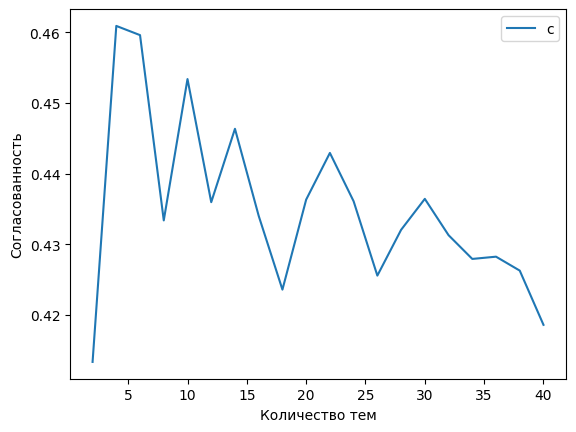

In [122]:
import matplotlib.pyplot as plt
limit=42; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Количество тем")
plt.ylabel("Согласованность")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [123]:
n_topics = x[coherence_values.index(max(coherence_values))]
n_topics

4

In [124]:
from gensim.models import LdaMulticore, CoherenceModel
lda_model = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=n_topics)

In [76]:
%%capture
!pip install pyLDAvis

In [77]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

In [ ]:
"оказаться", "находиться", "канал", "месяц", "представитель", "сообщить", "второй", "момент", "пока", "несколько", "миллион", "снова", "срок", "некоторый", "иностранный", "владимир"

In [125]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.002356  0.003896       1        1  30.262815
3      0.005274  0.018682       2        1  27.162508
0      0.015544 -0.016296       3        1  22.975390
2     -0.023174 -0.006282       4        1  19.599287, topic_info=           Term        Freq        Total Category  logprob  loglift
1293    женщина  396.000000   396.000000  Default  30.0000  30.0000
150     военный  823.000000   823.000000  Default  29.0000  29.0000
888   оказаться  398.000000   398.000000  Default  28.0000  28.0000
215     девушка  194.000000   194.000000  Default  27.0000  27.0000
326        друг  186.000000   186.000000  Default  26.0000  26.0000
...         ...         ...          ...      ...      ...      ...
183         сша  108.508858   662.850219   Topic4  -6.2632  -0.1800
376     украина  154.931683  1399.204731   Topic4  -5.9070  -0.5710
300     силовик   88.545640   472.790904   Topic4  -6.4665  -0.0455
165   несколько   85.326902   456.031281   Topic4  -6.5035  -0.0464
81          суд   87.340310   554.169042   Topic4  -6.4802  -0.2180

[392 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
2120       1  0.239791          авария
2120       2  0.159861          авария
2120       3  0.506226          авария
2120       4  0.106574          авария
22837      1  0.284065  авиакатастрофа
...      ...       ...             ...
2602       1  0.267357          январь
2602       2  0.257976          январь
2602       3  0.328334          январь
2602       4  0.145405          январь
20472      3  0.738737          янкина

[844 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3])

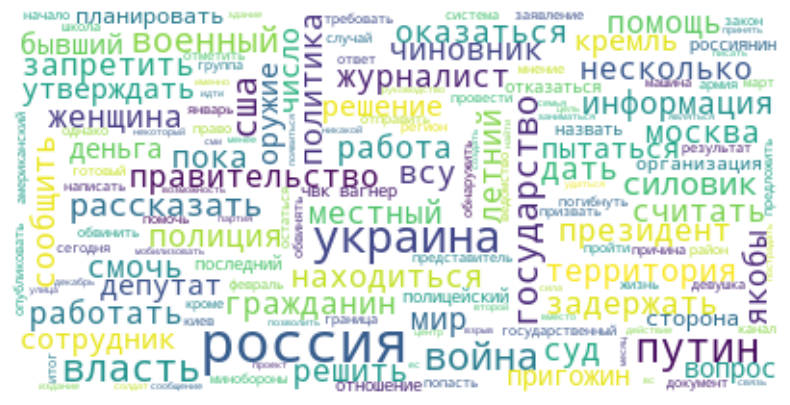

In [116]:
from wordcloud import WordCloud
wc = WordCloud(max_font_size=30, max_words=300, background_color="white").generate(' '.join(all_words))
plt.figure(figsize=(12.5, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig("wordcloud.png", dpi=800)

In [ ]:
"утверждать", "написать", "рассказать", "смочь", "сотрудник", "итог", "случай", "ответ", "летний", "назвать", "март", "якобы", "попасть"

In [128]:
from natasha import NamesExtractor, MorphVocab

morph_vocab = MorphVocab()
extractor = NamesExtractor(morph_vocab)

/Users/bellesbae/.virtualenvs/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/bellesbae/.virtualenvs/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/bellesbae/.virtualenvs/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/Users/bellesbae/.virtualenvs/lib/python3.9/site-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.sign

In [132]:
def extract_names(text):
    matches = extractor(text)
    names = []
    for match in matches:
        start = match.start
        end = match.stop
        name = text[start:end]
        names.append(name)
    return names

In [135]:
all_names = []

for data in df2["post"].to_list():
    names = extract_names(data)
    all_names.extend(names)

[]

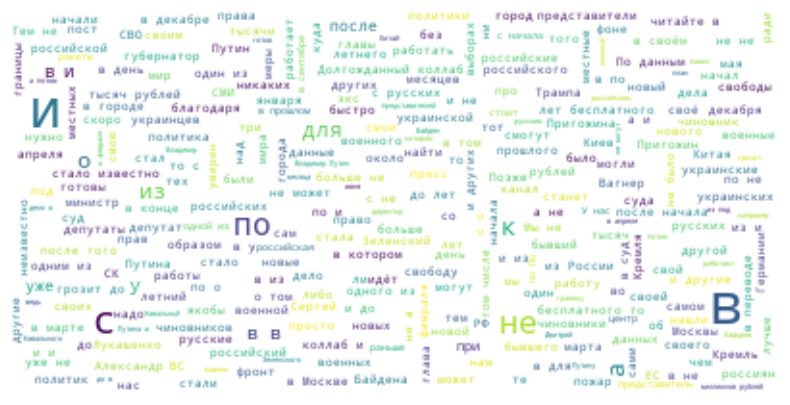

In [136]:
from wordcloud import WordCloud
wc_names = WordCloud(max_font_size=30, max_words=300, background_color="white").generate(' '.join(all_names))
plt.figure(figsize=(12.5, 5))
plt.imshow(wc_names, interpolation="bilinear")
plt.axis("off")
plt.plot()

чзх обьясните пожалуйста